# NLP新闻分类
队名：叶氏集团<br />
队长：吴兴平<br />
队员：叶鹏、冯钦楠<br />
项目来源：https://tianchi.aliyun.com/competition/entrance/531810/information

## 一、导入必要的库
&emsp;&emsp;在开始之前，我们需要导入所有必要的库，包括数据处理、文本向量化、模型训练和评估所需的库。

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## 二、设置绘图参数&emsp;&emsp;为了确保图表中的中文字符能够正确显示，我们需要设置 matplotlib 的字体和负号显示参数。。

In [3]:
plt.rcParams['font.sans-serif'] = ['SimSun']  # 设置字体为宋体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

## 三、 数据读取与预处理&emsp;&emsp;读取训练集和测试集的数据，并将文本标签转换为数值。。

In [5]:
# 读取训练集数据
train_df = pd.read_csv('Data/train_set.csv', sep='\t')

# 读取测试集数据
test_df = pd.read_csv('Data/test_a.csv', sep='\t')

# 将标签转换为数值
label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['label'])

## 四、数据探索与可视化
&emsp;&emsp;对训练集的类别分布进行探索，并绘制条形图。

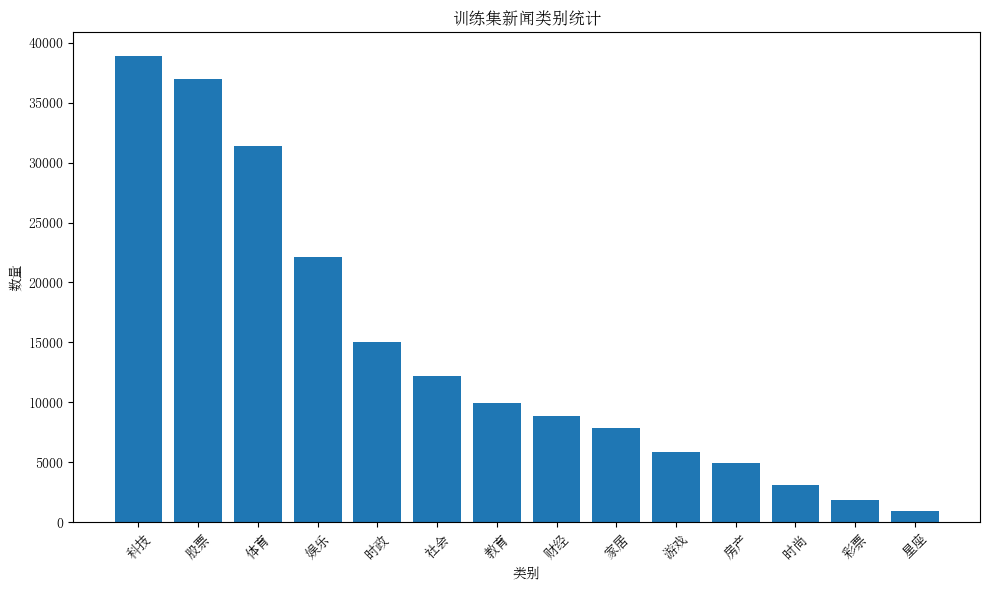

In [7]:
# 获取类别名称和对应的计数
category_counts = train_df['label'].value_counts().sort_index()

# 定义类别名称映射
category_names = {
    0: '科技', 1: '股票', 2: '体育', 3: '娱乐', 4: '时政',
    5: '社会', 6: '教育', 7: '财经', 8: '家居', 9: '游戏',
    10: '房产', 11: '时尚', 12: '彩票', 13: '星座'
}

# 将类别编号转换为类别名称
category_counts.index = category_counts.index.map(category_names)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('类别')
plt.ylabel('数量')
plt.title('训练集新闻类别统计')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 五、文本向量化&emsp;&emsp;使用 TF-IDF 方法将文本数据转换为数值型特征。。

In [9]:
# 定义TF-IDF向量化器
tfidf = TfidfVectorizer(max_features=5000)

# 将文本数据进行TF-IDF向量化
X_train_tfidf = tfidf.fit_transform(train_df['text'])
X_test_tfidf = tfidf.transform(test_df['text'])

## 六、模型训练与验证
&emsp;&emsp;分割数据集，训练 LinearSVC 模型，并在验证集上评估模型性能。

In [11]:
# 分割训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train_df['label'], test_size=0.2, random_state=42)

# 定义分类器，并显式设置 dual 参数
clf = LinearSVC(dual='auto')

# 训练模型
clf.fit(X_train, y_train)

# 在验证集上进行预测
y_pred = clf.predict(X_val)

# 计算评估指标
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')

print(f'准确率: {accuracy:.4f}')
print(f'精准率: {precision:.4f}')
print(f'召回率: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

准确率: 0.9257
精准率: 0.9156
召回率: 0.9041
F1-score: 0.9096


## 七、混淆矩阵可视化&emsp;&emsp;绘制混淆矩阵，以可视化模型在各个类别上的性能。。

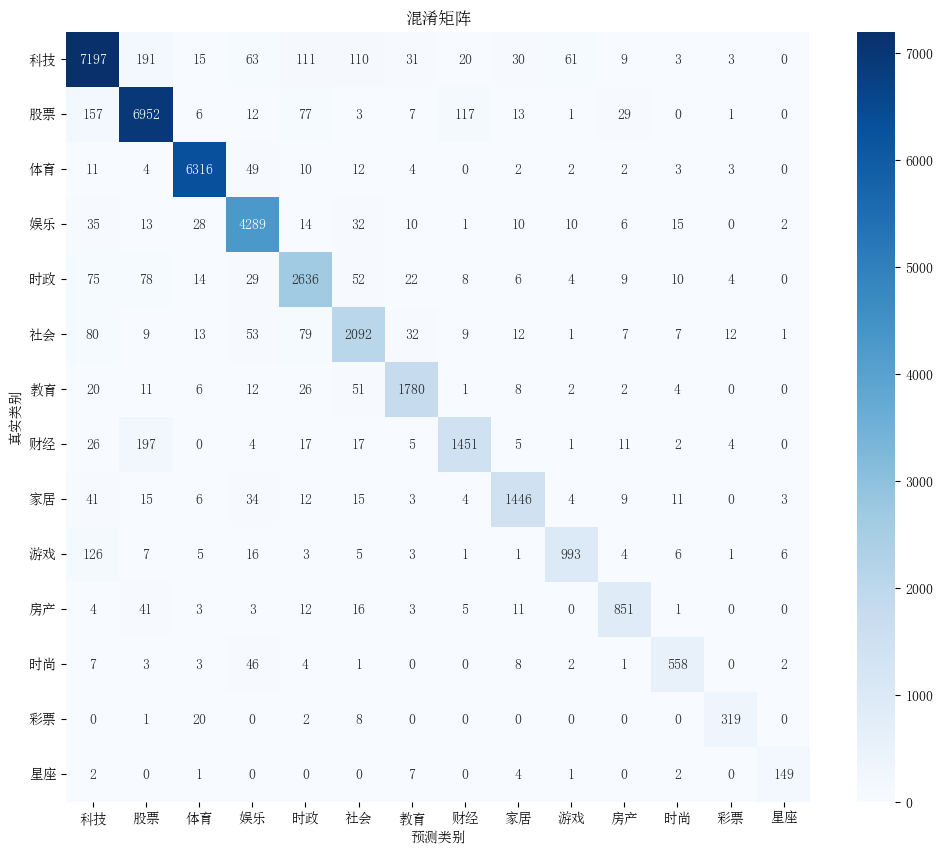

In [13]:
# 绘制混淆矩阵
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=category_names.values(), yticklabels=category_names.values())
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.title('混淆矩阵')
plt.yticks(rotation=0)
plt.show()

## 八、测试集预测与结果输出&emsp;&emsp;在测试集上进行预测，并将预测结果转换回原始标签，最后输出到 CSV 文件。。

In [15]:
# 在测试集上进行预测
y_test_pred = clf.predict(X_test_tfidf)

# 将预测结果转换回原始标签
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

# 输出预测结果
test_df['predicted_label'] = y_test_pred_labels
test_df.to_csv('Data/test_a_predicted.csv', index=False)

## 九、测试集预测结果可视化
&emsp;&emsp;统计测试集的预测类别分布，并绘制条形图。

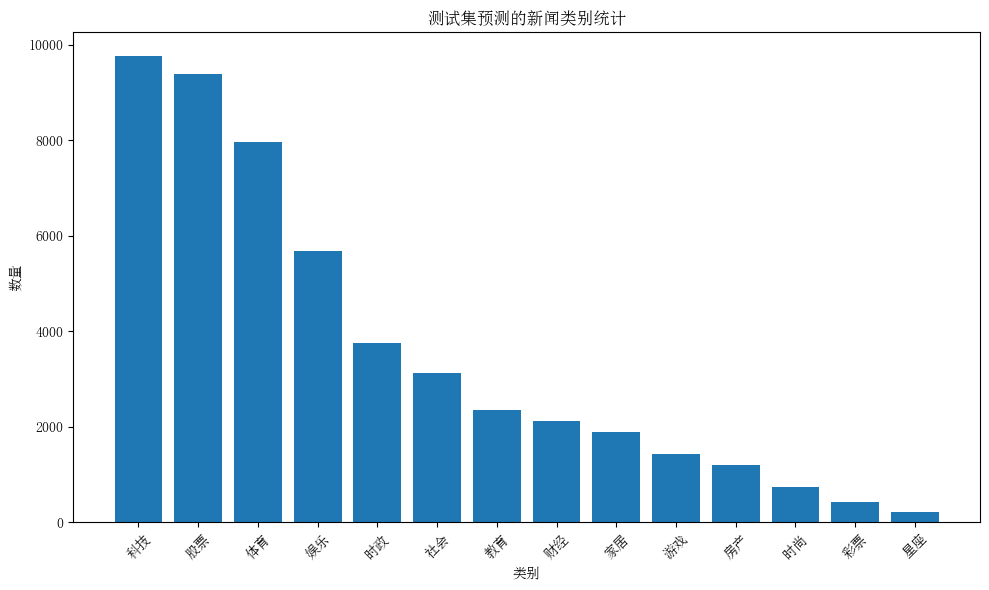

In [17]:
# 统计测试集的预测的新闻类别分类
test_category_counts = test_df['predicted_label'].value_counts().sort_index()

# 将类别编号转换为类别名称
test_category_counts.index = test_category_counts.index.map(category_names)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(test_category_counts.index, test_category_counts.values)
plt.xlabel('类别')
plt.ylabel('数量')
plt.title('测试集预测的新闻类别统计')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()